# Session 1
## Topics to be covered:
### 1. How to use qiskit to construct, visualize and apply measurement to quantum circuits?
### 2. How to construct **Single Quantum Gates:** X (Not) gate, H (Hadamard) gate , I (Identity) gate, Z (Pauli-Z) gate, **2-qubit gates:** CX (Controlled Not) gate, Swap gate and **3-qubit gate:** CCX (Double controlled not) gate
### 3. How to run circuits on a simulator and get the statevector (mathematical and using bloch sphere), unitary matrix, and histogram / result after measurement?
### 4. How to run a quantum circuit on real quantum computer of IBM?
### 5. How to create the four Bell states using the quantum circuits?

# Installing Libraries

In [ ]:
!pip install qiskit==0.46.0
!pip install pylatexenc
!pip install qiskit_aer
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=6d64e331e170e4d99432b48f33486ae9715f54cb2974ea7ae912fcdb0ec3d89f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

# Importing Libraries

In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

<ipython-input-2-47da8130673a>:2: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


# Simple Circuit

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


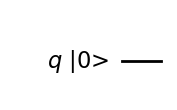

In [ ]:
#Creating a quantum circuit
circuit = QuantumCircuit(1)
#QuantumCircuit takes 2 arguments, (qbit, classicalbit), since we want to create a quantum circuit with only one qbit, we give 1 here

#drawing a quantum circuit
circuit.draw(output = 'mpl', initial_state = True)
#mpl means matplotlib, gives better plots. Initial_state=True shows the initial state of the qbit, otherwise it wouldnt show.

#Initial states are shown using ket, and final using bra. Circuit flow is left to right

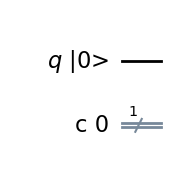

In [ ]:
#if we want to do measurements, we can use classical bits
circuit = QuantumCircuit(1, 1)
circuit.draw(output = 'mpl', initial_state = True)

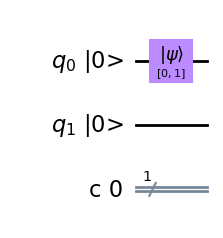

In [ ]:
#in c 0 1, 1 means that there is 1 classical bit with initial state 0

#if we want, we can change the initial state of the qbit to 1. We need to do this before drawing. But we cannot do that for the classical bit. C-bits always start from 0

circuit = QuantumCircuit(2, 1)

#initialize a different initial state
initial_state = [0, 1]
#[0, 1] represents state |1> and [1, 0] represents state |0> according to column vector representations
circuit.initialize(initial_state, 0)
#here, (initial_state, 0) means that we are working with the zero-th qbit
circuit.draw(output = 'mpl', initial_state = True)

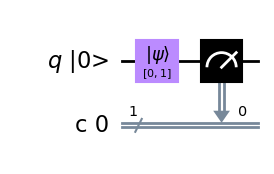

In [ ]:
#classical bit is basically a register where we can store the result after measurenment since the qbit's state is collapsed after measurement
#how to do measurement? Shown below:
circuit = QuantumCircuit(1, 1)

initial_state = [0, 1]
circuit.initialize(initial_state, 0)

#apply measurement
#circuit.measure(qbit, cbit) -< here we need to provide the indices of the qbit and cbit
circuit.measure(0, 0)


circuit.draw(output = 'mpl', initial_state = True)

## Single Quantum Gate
Called such because to implement these, we need only 1 qubit

### X Gate / NOT Gate
Purpose -> Flips state |0> to state |1> and vice-versa

|0> to |1>

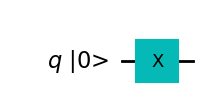

In [ ]:
circuit = QuantumCircuit(1)

circuit.x(0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

|1> to |0>

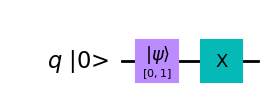

In [ ]:
circuit = QuantumCircuit(1)


#initialize a different initial state
initial_state = [0, 1]
#[0, 1] represents state |1> and [1, 0] represents state |0> according to column vector representations
circuit.initialize(initial_state, 0)
#here, (initial_state, 0) means that we are working with the zero-th qbit

circuit.x(0)


circuit.draw(output = 'mpl', initial_state = True)

### Hadamard Gate
Also a single qubit gate. It creates a superposition of states from a single qubit.


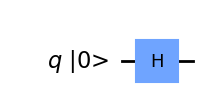

In [ ]:
#create a circuit with only one qbit
circuitt = QuantumCircuit(1)

#apply a hadamard gate
circuitt.h(0)
#draw the circuit
circuitt.draw(output = 'mpl', initial_state = True)

### Identity Gate

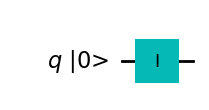

In [ ]:
#create a circuit with only one qbit
circuit = QuantumCircuit(1)

#apply identity gate
circuit.id(0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

### 2 Qbit Gates
#### CX Gate

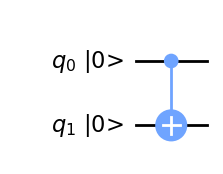

In [ ]:
circuit = QuantumCircuit(2)

#apply gate
circuit.cx(0, 1) #(control, target)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

### Swap Gate
Swaps the initial states of two qubits


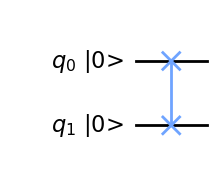

In [ ]:
circuit = QuantumCircuit(2)

#apply gate
circuit.swap(0, 1) #(swapping qubit1, swapping qubit2)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

### 3 Qbit gate
CCX -> if the first control is 1 and the 2nd control is 1, only then make the target qubit 1, otherwise keep it 0

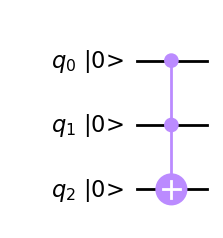

In [ ]:
circuit = QuantumCircuit(3)

#apply gate
circuit.ccx(0, 1, 2) #(control 1, control 2, target) -> double controlled not gate -> 2 control qubits and one target qubit

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

Our works:
1. Build a circuit
2. Debug / Run it on a simulator
3. Run it on a real Q device

we will see here how to work with only one simulator instead of many.

Purpose of a simulator:
We can get 3 types of outputs from a simulator:
1. statevector
2. unitary matrix
3. Histogram / result after measurement


Our workflow:
build circuit -> run on simulator -> find statevector

***Need to understand and see gates (hadamard, c-not gate these are basics), will be explained together as we go

## Simulator Purpose 1: State Vector

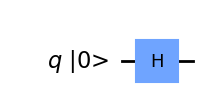

In [ ]:
#create a circuit with only one qbit
circuitt = QuantumCircuit(1)

#apply a hadamard gate
circuitt.h(0)
#draw the circuit
circuitt.draw(output = 'mpl', initial_state = True)

In [ ]:
#statevector = state + vector -> state of the qbit in a vector format

#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuitt.save_statevector()
#run on simulator
circuitt = transpile(circuitt, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get statevector
result = simulator.run(circuitt).result()
statevector = result.get_statevector(circuitt)

<ipython-input-15-7cafd6ac79f2>:4: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('aer_simulator')


In [ ]:
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


# Visualize the final state / statevector

In [ ]:
array_to_latex(statevector) #vector representation

<IPython.core.display.Latex object>

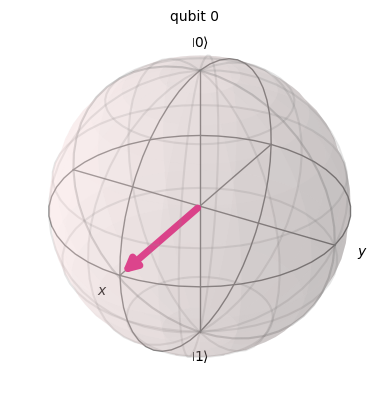

In [ ]:
#in which quantum state is the statevector? we can visualize using bloch sphere
plot_bloch_multivector(statevector)

In [ ]:
#since here the state of the qbit is neither |0> nor |1>, we say that the qbit is in superposition state
#[0, 1] = |1>
#[1, 0] = |0>
#[0.707, 0.707] = superposition of |0> and |1>

## Simulator Purpose 2: Unitary Matrix


## Without applying any gate

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


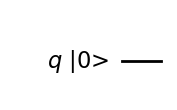

In [ ]:
#create a circuit with only one qbit
circuit = QuantumCircuit(1)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_unitary()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get result
result = simulator.run(circuit).result()

#get the unitary from result
unitary = result.get_unitary(circuit)

In [ ]:
print(unitary)
array_to_latex(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
# unitary operator is a circuit, an operator. These circuits are basically matrix multiplications. To get the matrix representation of circuits, we need unitary matrix
# Here, [[1, 0], [0, 1]] is an Identity gate, which represents the absensce of a gate

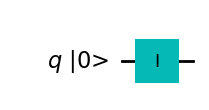

In [ ]:
#create a circuit with only one qbit
circuit = QuantumCircuit(1)

#apply identity gate
circuit.id(0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_unitary()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get result
result = simulator.run(circuit).result()

#get the unitary from result
unitary = result.get_unitary(circuit)

In [ ]:
print(unitary)
array_to_latex(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
# since we get the same result applying and not applying identity gate, it is proved that identity gate is the absence of a gate

## Applying a Hadamard Gate

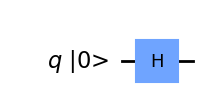

In [ ]:
#create a circuit with only one qbit
circuit = QuantumCircuit(1)

#apply hadamard gate
circuit.h(0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_unitary()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get result
result = simulator.run(circuit).result()

#get the unitary from result
unitary = result.get_unitary(circuit)

In [ ]:
print(unitary)
array_to_latex(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
# the work of unitary is that we applied a gate, and if we dont know the matrix representation of the gate, we get that using unitary matrix
# that means Hadamard gate matrix is [[0.707, 0.707], [0.707, -0.707]], which we know from theoretical knowledge

## Applying two Hadamard Gates

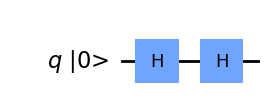

In [ ]:
#create a circuit with only one qbit
circuit = QuantumCircuit(1)

#apply 2 hadamard gates
circuit.h(0)
circuit.h(0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_unitary()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get result
result = simulator.run(circuit).result()

#get the unitary from result
unitary = result.get_unitary(circuit)

In [ ]:
print(unitary)
array_to_latex(unitary)

Operator([[1.-6.1232340e-17j, 0.+6.1232340e-17j],
          [0.+6.1232340e-17j, 1.-1.8369702e-16j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
# This gives identity matrix again because it is basically the multiplication of 2 hadamard metrices
# This happens because quantum gates are inverse of themselves, hence they cancel each other out

## Simulator Purpose 3: Results after measurement

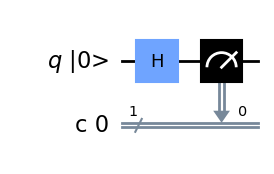

In [ ]:
#ses2

#create a circuit with only one qbit and one cbit to keep the measurement in
circuit = QuantumCircuit(1, 1)

#apply 2 hadamard gates
circuit.h(0)

#measurement
circuit.measure(0, 0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')


circuit = transpile(circuit, simulator)

#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device
job = simulator.run(circuit, shots = 1000)

#monitor the job
job_monitor(job)

# Get result
result = job.result()

#collect the histogram data from result
count = result.get_counts()

Job Status: job has successfully run


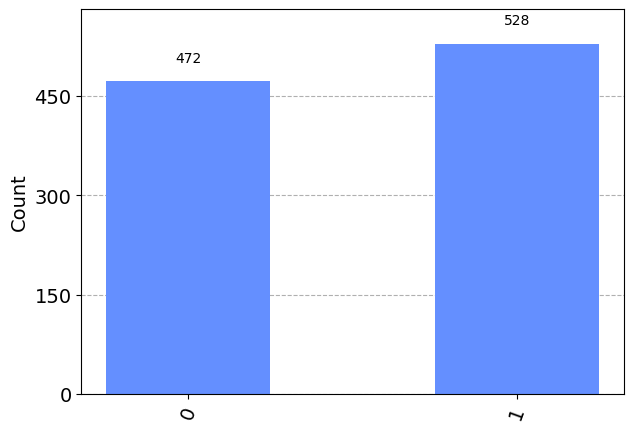

In [ ]:
plot_histogram(count)

## Run on real Quantum Device

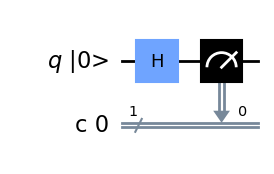

In [ ]:
#create a circuit with only one qbit and one cbit to keep the measurement in
circuit = QuantumCircuit(1, 1)

#apply 2 hadamard gates
circuit.h(0)

#measurement
circuit.measure(0, 0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#import library for QC
from qiskit import IBMQ

#save API token
IBMQ.save_account('418aca4abfec2d650b3b0f98d9f78b4f83fac5e10cb1280ab9dda5b4ad9b51376751146b8b8838f443c748c5f8ce391aad8af5e00dc1ba2a80362d1ee9746c42', overwrite=True)

#load account
IBMQ.load_account()

#select a provider
provider = IBMQ.get_provider('ibm-q')

# List available backends and select one
print(provider.backends())

<ipython-input-40-2d1ef1c423b7>:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('418aca4abfec2d650b3b0f98d9f78b4f83fac5e10cb1280ab9dda5b4ad9b51376751146b8b8838f443c748c5f8ce391aad8af5e00dc1ba2a80362d1ee9746c42', overwrite=True)
<ipython-input-40-2d1ef1c423b7>:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('418aca4abfec2d650b3b0f98

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:

#select a quantum device
quant_comp = provider.get_backend('ibm_osaka')

#run our circuit on real device
job = execute(circuit, backend = quant_comp)

#monitor the job
job_monitor(job)

#get result
result = job.result()

#get histogram data
count = result.get_counts()

<ipython-input-41-01d738557204>:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend = quant_comp)


Job Status: job has successfully run


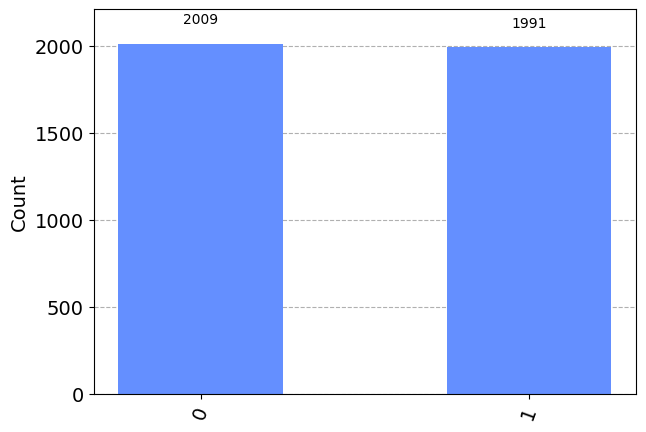

In [ ]:
plot_histogram(count)

In [ ]:
#select a quantum device
quant_comp = provider.get_backend('ibmq_qasm_simulator')

#run our circuit on real device
job = execute(circuit, backend = quant_comp)

#monitor the job
job_monitor(job)

#get result
result = job.result()

#get histogram data
count = result.get_counts()

<ipython-input-43-9d4fbfc639e3>:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend = quant_comp)


Job Status: job is actively running

KeyboardInterrupt: 

In [ ]:
plot_histogram(count)

## Bell State / Entangled State
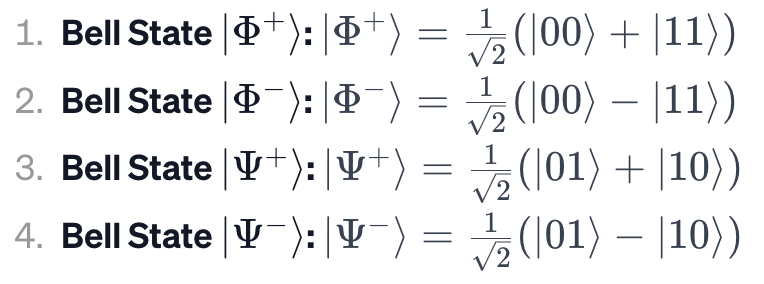

**1. Quantum Entanglement**

**2. Quantum Cryptography**: The properties of Bell states, especially their sensitivity to measurements, underpin quantum key distribution (QKD) protocols such as BB84 and E91. These protocols use entangled states to ensure secure communication, allowing two parties to detect any eavesdropping attempt, which would inevitably alter the state of the entangled qubits. This leads to fundamentally secure communication channels based on the laws of quantum mechanics.

**3. Quantum Energy Teleportation**: For quantum teleportation protocols.

**4. Quantum Algorithms**: For example, for quantum search (Grover's algorithm) and quantum factorization (Shor's algorithm), offering exponential speed-ups for specific computational problems.



## Preparing Bell State 1

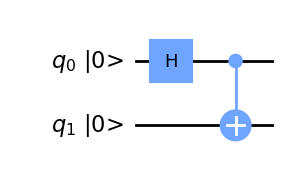

In [ ]:
#create a circuit with only one qbit and one cbit to keep the measurement in
circuit = QuantumCircuit(2)

#apply hadamard and cnot gates
circuit.h(0)
circuit.cx(0, 1) #it is a multi qbit gate, takes at least 2 qbits unlike hadamard gate
#first one is control qbit, second one is target qbit. Control qbit is a condition, if it is true, only then target qbit is changed and executed, otherwise not
#the condition is that if there is 1 in the control qbit, it will operate on the target qbit and make it 1 from 0

# circuit.measure(1, 0)

#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#statevector = state + vector -> state of the qbit in a vector format

#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_statevector()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get statevector
result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)

In [ ]:
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
array_to_latex(statevector) #vector representation

<IPython.core.display.Latex object>

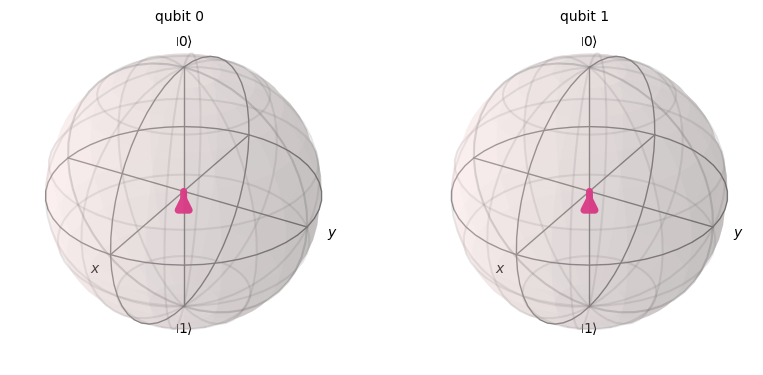

In [ ]:
#in which quantum state is the statevector? we can visualize using bloch sphere
plot_bloch_multivector(statevector)

In [ ]:
#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')


circuit = transpile(circuit, simulator)

#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device
job = simulator.run(circuit, shots = 1000)

#monitor the job
job_monitor(job)

# Get result
result = job.result()

#collect the histogram data from result
count = result.get_counts()

Job Status: job has successfully run


<ipython-input-64-5033e25668d0>:1: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(count)


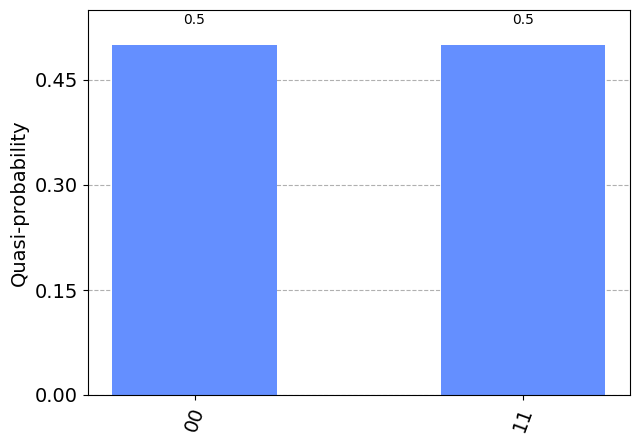

In [ ]:
plot_histogram(count)

In [ ]:
#import library for QC
from qiskit import IBMQ

#save API token
IBMQ.save_account('418aca4abfec2d650b3b0f98d9f78b4f83fac5e10cb1280ab9dda5b4ad9b51376751146b8b8838f443c748c5f8ce391aad8af5e00dc1ba2a80362d1ee9746c42', overwrite=True)

#load account
IBMQ.load_account()

#select a provider
provider = IBMQ.get_provider('ibm-q')

# List available backends and select one
print(provider.backends())

ibmqfactory.load_account:WARNING:2024-03-02 14:43:56,962: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
#select a quantum device
quant_comp = provider.get_backend('ibm_osaka')

#run our circuit on real device
job = execute(circuit, backend = quant_comp)

#monitor the job
job_monitor(job)

#get result
result = job.result()

#get histogram data
count = result.get_counts()

<ipython-input-66-01d738557204>:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend = quant_comp)


TranspilerError: "Unable to translate the operations in the circuit: ['h', 'save_statevector', 'cx'] to the backend's (or manually specified) target basis: ['reset', 'rz', 'delay', 'id', 'measure', 'snapshot', 'sx', 'barrier', 'ecr', 'x']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum-computing.ibm.com/api/qiskit/qiskit.transpiler.passes.BasisTranslator#translation-errors"

## Preparing Bell State 2

In [ ]:
circuit = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
circuit.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
circuit.cx(0, 1)

# Apply a Pauli-Z gate to the first qubit to introduce a phase flip
circuit.z(0)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".

  self._style, def_font_ratio = load_style(self._style)


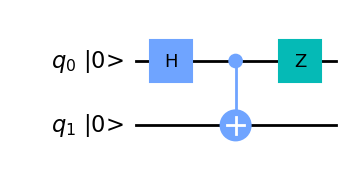

In [ ]:
#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#statevector = state + vector -> state of the qbit in a vector format

#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_statevector()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get statevector
result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)

In [ ]:
print(statevector)

Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,

             -0.70710678+0.j],

            dims=(2, 2))


In [ ]:
array_to_latex(statevector) #vector representation

<IPython.core.display.Latex object>

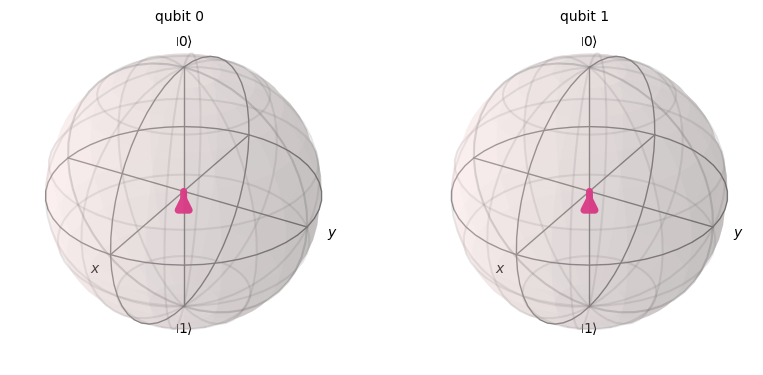

In [ ]:
#in which quantum state is the statevector? we can visualize using bloch sphere
plot_bloch_multivector(statevector)

## Preparing Bell State 3

In [ ]:
circuit = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
circuit.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
circuit.cx(0, 1)

# Apply a Pauli-X gate to the second qubit
circuit.x(1)

# The circuit now prepares the Bell state |Psi+>

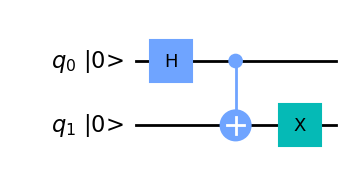

In [ ]:
#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#statevector = state + vector -> state of the qbit in a vector format

#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_statevector()
#run on simulator
circuit = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get statevector
result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)

In [ ]:
print(statevector)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,

             0.        +0.j],

            dims=(2, 2))


In [ ]:
array_to_latex(statevector) #vector representation

<IPython.core.display.Latex object>

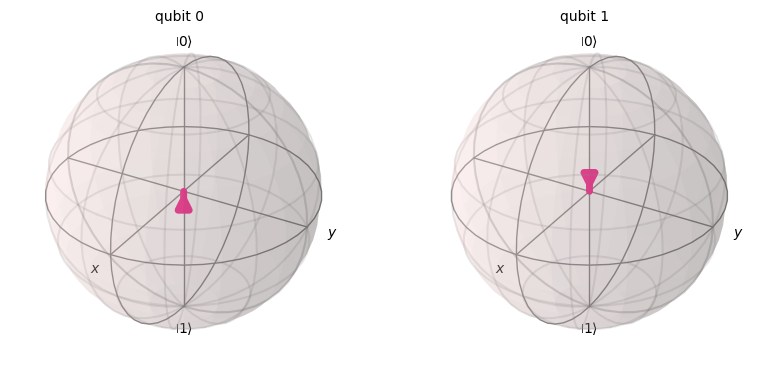

In [ ]:
#in which quantum state is the statevector? we can visualize using bloch sphere
plot_bloch_multivector(statevector)

## Preparing Bell State 4

In [ ]:
circuit = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
circuit.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
circuit.cx(0, 1)

# Apply a Pauli-Z gate to the first qubit and a Pauli-X gate to the second qubit
circuit.z(0)
circuit.x(1)

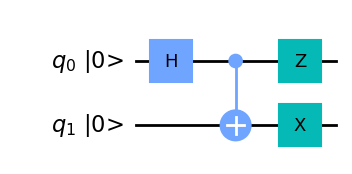

In [ ]:
#draw the circuit
circuit.draw(output = 'mpl', initial_state = True)

In [ ]:
#statevector = state + vector -> state of the qbit in a vector format

#select simulator from Aer package
simulator = Aer.get_backend('aer_simulator')

circuit.save_statevector()
#run on simulator
qc_phi_minus = transpile(circuit, simulator)
#why job and not result? We will understand later when we run it later on real qunatum device -> assigned as a job since it is a public device

# Run and get statevector
result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)

In [ ]:
print(statevector)

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,

             -0.        +0.j],

            dims=(2, 2))


In [ ]:
array_to_latex(statevector) #vector representation

<IPython.core.display.Latex object>

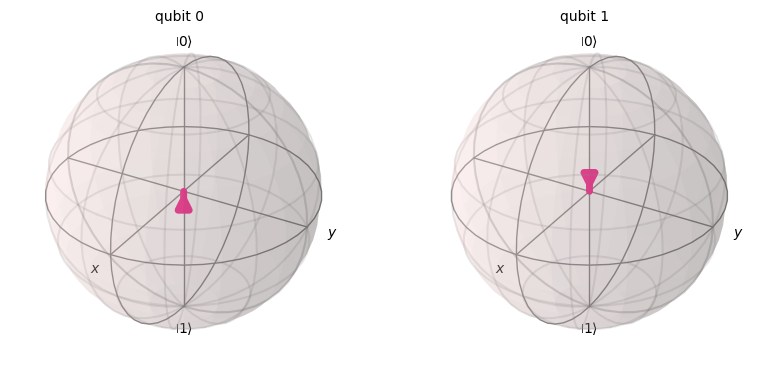

In [ ]:
#in which quantum state is the statevector? we can visualize using bloch sphere
plot_bloch_multivector(statevector)